# Gemini API: Streaming Quickstart

This notebook demonstrates streaming in the JS SDK. By default, the JS SDK returns a response after the model completes the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.


## Setup

### Install the Google GenAI SDK

Install the Google GenAI SDK from [npm](https://www.npmjs.com/package/@google/genai). 

```bash
$ npm install @google/genai
```

### Setup your API key

You can [create](https://aistudio.google.com/app/apikey) your API key using Google AI Studio with a single click.

Remember to treat your API key like a password. Don't accidentally save it in a notebook or source file you later commit to GitHub. In this notebook we will be storing the API key in a `.env` file. You can also set it as an environment variable or use a secret manager. 

Here's how to set it up in a `.env` file:

```bash
$ touch .env
$ echo "GEMINI_API_KEY=<YOUR_API_KEY>" >> .env
```

:::{.callout-tip}

Another option is to set the API key as an environment variable. You can do this in your terminal with the following command:

```bash
$ export GEMINI_API_KEY="<YOUR_API_KEY>"
```
:::

### Load the API key

To load the API key from the `.env` file, we will use the `dotenv` package. This package loads environment variables from a `.env` file into `process.env`. 

```bash
$ npm install dotenv
```

Then, we can load the API key in our code:


In [1]:
const dotenv = require("dotenv") as typeof import("dotenv");

dotenv.config({
  path: "../.env",
});

const GEMINI_API_KEY = process.env.GEMINI_API_KEY ?? "";
if (!GEMINI_API_KEY) {
  throw new Error("GEMINI_API_KEY is not set in the environment variables");
}
console.log("GEMINI_API_KEY is set in the environment variables");


GEMINI_API_KEY is set in the environment variables


:::{.callout-note}
In our particular case the `.env` is is one directory up from the notebook, hence we need to use `../` to go up one directory. If the `.env` file is in the same directory as the notebook, you can omit it altogether. 

```
│
├── .env
└── quickstarts
    └── Streaming.ipynb
```
:::


### Initialize SDK Client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.


In [20]:
const google = require("@google/genai") as typeof import("@google/genai");

const ai = new google.GoogleGenAI({ apiKey: GEMINI_API_KEY, httpOptions: { apiVersion: "v1alpha" } });


### Select a model

Now select the model you want to use in this guide, either by selecting one in the list or writing it down. Keep in mind that some models, like the 2.5 ones are thinking models and thus take slightly more time to respond (cf. [thinking notebook](quickstarts/Get_started_thinking.ipynb) for more details and in particular learn how to switch the thiking off).


In [3]:
const tslab = require("tslab") as typeof import("tslab");

const MODEL_ID = "gemini-2.5-flash-preview-05-20";


## Handle streaming responses

To stream responses, use `Models.generateContentStream`.


In [4]:
const streaming_response = await ai.models.generateContentStream({
  model: MODEL_ID,
  contents: "Tell me a story in 300 words.",
});
for await (const chunk of streaming_response) {
  tslab.display.markdown(chunk.text ?? "");
  tslab.display.markdown("\n----\n");
}


Elara, a


----


 wisp of a woman with spectacles perched on her nose, hummed softly as she ran her hand over the spines of returned books. For thirty years, the old library had been her sanctuary, its quiet corners and whispered secrets her constant companions


----


. Today, a worn copy of "Tales of the Forgotten Isles" landed on her desk. As she opened it to stamp its return, a peculiar object slipped from between its pages.

It wasn't a bookmark. It was a


----


 small, intricately carved wooden bird, no larger than her thumb, its tiny eyes inlaid with what looked like chips of mother-of-pearl. It felt impossibly light, yet solid, and radiating a faint, almost imperceptible warmth.


----


 Etched into its breast were three symbols she'd never seen before, swirls and dots that resembled miniature galaxies. Elara's heart, usually as steady as a metronome, fluttered with a rare curiosity.

She carried the


----


 little bird to her research desk, pulling out dusty tomes on ancient languages and forgotten crafts. Hours blurred. Then, in an obscure reference about mythical navigators, she found it: a match for the symbols. They weren't a


----


 language, but a series of directional indicators – a miniature compass rose pointing not to north or south, but to a specific point on an old, forgotten map. A map *she* knew intimately: the library's original blueprint, stored


----


 in the archives.

Her gaze drifted to the ancient, unused globe in the corner, its brass stand tarnished with age. Following the miniature bird's silent instruction, she ran her fingers along the globe's base. Behind a


----


 false panel, a small, hidden compartment. Inside, nestled on velvet, lay a single, exquisite silver locket. No grand treasure, but a personal secret, centuries old. Elara smiled, the quiet library suddenly alive with stories yet


----


 untold.


----


## Multimodal streaming

Gemini models have multiple different output capabilities, such as text, images, and audio. Few models like `gemini-2.0-flash-preview-image-generation` and `gemini-2.5-flash-preview-native-audio-dialog` support interleaved streaming, which means that the model can return multiple types of outputs in a single response.


### Text and Image streaming


Let's start with a simple example of streaming text and image responses. You will need to use the `gemini-2.0-flash-preview-image-generation` model for this example. First let's define the model and the prompt:



In [5]:
const TEXT_AND_IMAGE_MODEL_ID = "gemini-2.0-flash-preview-image-generation";

const PROMPT = `
Comic Panel Script: Elara's Discovery

Panel 1: “The Return”
--------------------------------
Scene:
A cozy, old library bathed in warm golden light. Bookshelves tower around a wooden desk where Elara — a thin, elderly woman with spectacles and a tidy bun — sits.

Focus:
Elara is mid-motion, flipping open a worn, leather-bound book titled “Tales of the Forgotten Isles”. Her expression is calm but focused.

Visual Detail:
A small carved wooden bird falls out of the book and hovers in the air just above the desk.

Caption (Top):
“For thirty years, the library had been Elara's quiet world.”

Dialogue (Elara, small speech bubble):
“Hm? What's this?”


Panel 2: “The Bird's Message”
--------------------------------
Scene:
A darker, more mysterious angle of the library. Elara is now at a research desk with several old books open, diagrams and a blueprint unfurled. The carved bird sits beside her, glowing faintly.

Focus:
Elara's eyes are wide with curiosity as she traces three glowing symbols on the bird's chest with one hand, the other pointing to a mark on the blueprint.

Visual Detail:
Behind her in the shadows, the old globe looms subtly.

Caption (Top):
“The symbols weren't a language, but a compass — leading not to north or south, but to something hidden.”

Dialogue (Elara, whispering): enableAffectiveDialog: true
“It matches… the old library map?”


Panel 3: “The Secret Within”
--------------------------------
Scene:
Elara kneels beside the ancient globe. The base is open, revealing a velvet-lined compartment with a glowing silver locket inside.

Focus:
Her face glows with wonder, reflected light from the locket shimmering in her spectacles.

Visual Detail:
The carved bird rests nearby, its tiny eyes glowing faintly.

Caption (Bottom):
“No gold, no grand prize — just a story, centuries old, waiting for the right reader.”

Dialogue (Elara, smiling softly):
“So this was your secret…”
`;


The model will generate an image based on the text prompt, and then stream the response back to you. The response will contain both the text and the image.


Panel

 1: A sun-drenched, classic library with towering bookshelves. A

 slender, older woman named Elara, with glasses perched on her nose and her grey hair neatly in a bun, sits at a dark wooden desk. Her hands are in the process of opening a very old, brown leather book titled "Tales

 of the Forgotten Isles". Her expression is peaceful concentration. A small, detailed wooden bird has just fallen from the pages and is suspended mid-air above the desk, catching the light. The caption at the top reads: "For thirty years

, the library had been Elara's quiet world." A small speech bubble points to Elara, containing the text: "Hm? What's this?"



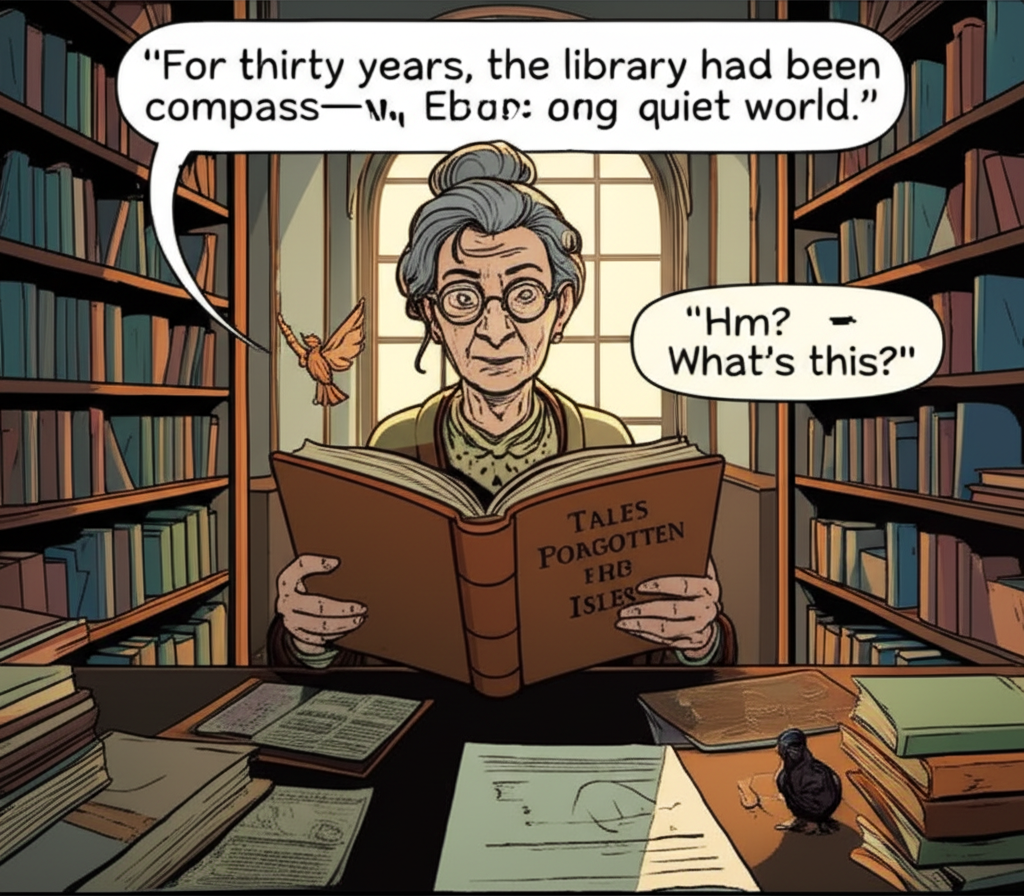

Panel 2: A more dimly lit section of the library, focusing on a

 different, cluttered research desk. Elara leans over several open ancient books, alongside rolled-out diagrams and a weathered blueprint. The small carved wooden bird sits beside her, emitting a soft, ethereal glow. Her eyes are wide with interest as

 one of her fingers traces three distinct glowing symbols etched on the bird's chest, while her other hand points to a specific marking on the blueprint. In the hazy background, a vintage globe is subtly visible in the shadows. The caption at

 the top reads: "The symbols weren't a language, but a compass — leading not to north or south, but to something hidden." Elara is whispering in a speech bubble: "It matches… the old library map?"



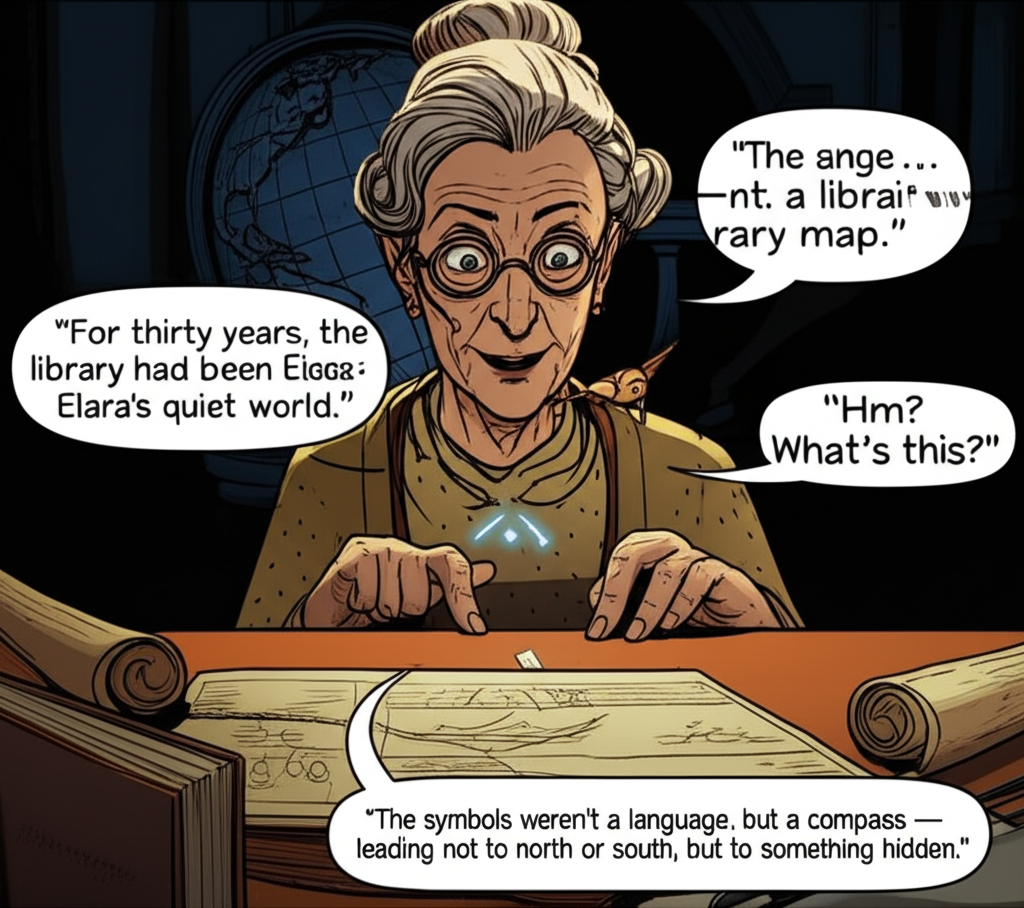

Panel 3: Elara is now kneeling beside the antique globe. The round

 wooden base of the globe is ajar, revealing a dark, velvety interior where a radiant silver locket rests, casting a soft glow. Her face is illuminated by the light emanating from the locket, creating a sense of wonder that is

 reflected in her spectacles. The small carved bird is situated close by, its tiny eyes faintly glowing. The caption at the bottom reads: "No gold, no grand prize — just a story, centuries old, waiting for the right reader."

 A small speech bubble shows Elara smiling gently as she says: "So this was your secret…"



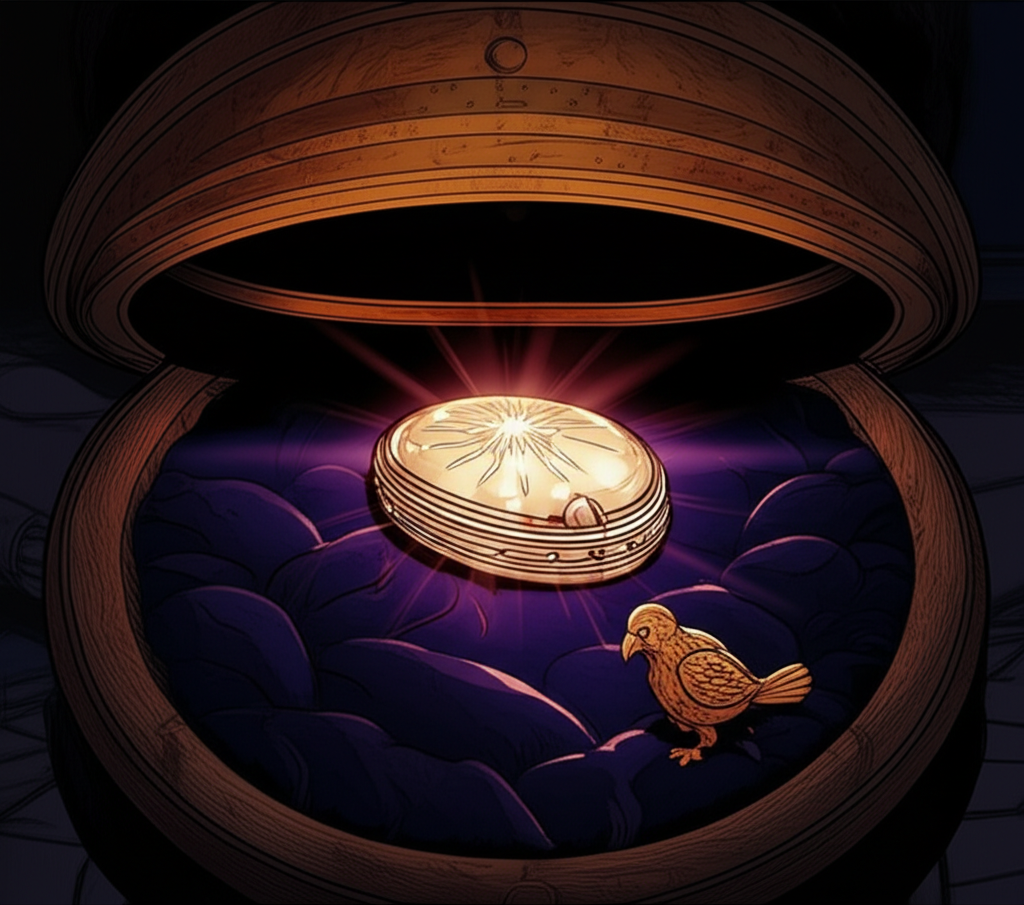

In [9]:
const streaming_image_response = await ai.models.generateContentStream({
  model: TEXT_AND_IMAGE_MODEL_ID,
  contents: [
    `
    Create a comic panel script based on the following text: ${PROMPT} 
    Please generate images for each panel as described in the script.
    `,
  ],
  config: {
    responseModalities: [google.Modality.TEXT, google.Modality.IMAGE],
  },
});
for await (const chunk of streaming_image_response) {
  let panel_text = "";
  for (const part of chunk.candidates?.[0]?.content?.parts ?? []) {
    if (part.text) {
      panel_text += part.text;
    } else if (part.inlineData) {
      const imageData = part.inlineData.data!;
      const buffer = Buffer.from(imageData, "base64");
      tslab.display.png(buffer);
    }
  }
  tslab.display.markdown(panel_text);
}


### Audio streaming

For audio streaming, you can use the `gemini-2.5-flash-preview-native-audio-dialog` model. This model will generate an audio response based on the text prompt and stream it back to you. Let's use this model capability to create an audiobook from a text prompt.



### Utility functions

The simplest way to playback the audio in Colab, is to write it out to a .wav file. So here is a simple wave file writer:


In [10]:
const fs = require("fs") as typeof import("fs");
const path = require("path") as typeof import("path");
const wave = require("wavefile") as typeof import("wavefile");

function saveAudioToFile(audioData: Int16Array, filePath: string) {
  fs.mkdirSync(path.dirname(filePath), { recursive: true });
  const wav = new wave.WaveFile();
  wav.fromScratch(1, 24000, "16", audioData);
  fs.writeFileSync(filePath, wav.toBuffer());
  console.debug(`Audio saved to ${filePath}`);
}


Let's define our narration script and the model to use for the audio generation. 


In [24]:
const AUDIO_PROMPT = `
Narration 1 [soft, warm voice with faint ambient library sounds]:

“For thirty years, Elara lived among the hush of books and dusted dreams. The library was more than home — it was her haven.”
“Elara's world was built on paper and silence.”

---

Narration 2 [slightly surprised tone, sound of a book closing softly]:

“But one quiet afternoon, a book returned with a secret tucked inside…”
“'Tales of the Forgotten Isles' thudded onto her desk.”

---

SFX: Book thump, soft wooden knock.

Narration 3 [curious, thoughtful voice, light ambient chime when bird appears]:

“A small carved bird, no bigger than her thumb, tumbled free — its eyes shimmering with mother-of-pearl.”
“She picked it up. It was warm. Alive with story.”

---

Narration 4 [paced slower, quiet awe]:

“Etched into its chest, three swirling glyphs. Not letters. Not art. A compass, not pointing north — but inward.”
“The bird pointed to a place she had once forgotten… but never lost.”

---

Narration 5 [warm, content tone]:

“Behind the old globe, a velvet nest. A silver locket, still warm. Not treasure. A memory.”
“Elara smiled. The library whispered back.”

`;

const TEXT_AND_AUDIO_MODEL_ID = "gemini-2.5-flash-preview-native-audio-dialog";


In [25]:
import { GoogleGenAI, LiveServerMessage, Modality, Session } from "@google/genai";

class AudioLooper {
  private session: Session;
  private turnIndex = 0;
  private responseQueue: LiveServerMessage[] = [];

  constructor(
    private ai: GoogleGenAI,
    private modelId: string
  ) {}

  async start() {
    this.session = await this.ai.live.connect({
      model: this.modelId,
      callbacks: {
        onopen: () => {
          console.debug("Opened");
        },
        onmessage: (message) => this.responseQueue.push(message),
        onerror: (e) => {
          console.debug("Error:", JSON.stringify(e, null, 2));
        },
        onclose: (e) => {
          console.debug("Close:", JSON.stringify(e, null, 2));
        },
      },
      config: { responseModalities: [Modality.AUDIO] },
    });
  }

  send(message: string) {
    console.debug(`Sending message: ${message}`);
    this.session.sendClientContent({
      turns: `Narrate the following text in a warm, engaging voice: ${message}`,
      turnComplete: true,
    });
  }

  async receive() {
    let done = false;
    const audioChunks: number[] = [];
    while (!done) {
      if (this.responseQueue.length > 0) {
        const response = this.responseQueue.shift();
        if (response?.data) {
          const audioBuffer = Buffer.from(response.data, "base64");
          const intArray = new Int16Array(
            audioBuffer.buffer,
            audioBuffer.byteOffset,
            audioBuffer.length / Int16Array.BYTES_PER_ELEMENT
          );
          audioChunks.push(...Array.from(intArray));
        }
        if (response?.serverContent?.turnComplete) {
          done = true;
          console.debug("Received complete response");
        }
      } else {
        await new Promise((resolve) => setTimeout(resolve, 100));
      }
    }
    const audioFilePath = path.join("../assets/streaming", `audio_response_${this.turnIndex++}.wav`);
    saveAudioToFile(new Int16Array(audioChunks), audioFilePath);
    tslab.display.html(`
      <h3>Audio Response ${this.turnIndex}</h3>
      <audio controls>
          <source src="../assets/streaming/audio_response_${this.turnIndex - 1}.wav" type="audio/wav">
          Your browser does not support the audio element.
      </audio>
    `);
  }

  stop() {
    this.session.close();
    console.debug("Session closed");
  }
}

async function asyncAudioLooper() {
  const audioLooper = new AudioLooper(ai, TEXT_AND_AUDIO_MODEL_ID);
  await audioLooper.start();

  const messages = AUDIO_PROMPT.split("---")
    .map((part) => part.trim())
    .filter(Boolean);

  for (const message of messages) {
    audioLooper.send(message);
    await audioLooper.receive();
  }

  audioLooper.stop();
}

await asyncAudioLooper();


Opened
Sending message: Narration 1 [soft, warm voice with faint ambient library sounds]:

“For thirty years, Elara lived among the hush of books and dusted dreams. The library was more than home — it was her haven.”
“Elara's world was built on paper and silence.”
Received complete response
Audio saved to ../assets/streaming/audio_response_0.wav


Audio Response 1 
 
 
 Your browser does not support the audio element.

Sending message: Narration 2 [slightly surprised tone, sound of a book closing softly]:

“But one quiet afternoon, a book returned with a secret tucked inside…”
“'Tales of the Forgotten Isles' thudded onto her desk.”
Received complete response
Audio saved to ../assets/streaming/audio_response_1.wav


Audio Response 2 
 
 
 Your browser does not support the audio element.

Sending message: SFX: Book thump, soft wooden knock.

Narration 3 [curious, thoughtful voice, light ambient chime when bird appears]:

“A small carved bird, no bigger than her thumb, tumbled free — its eyes shimmering with mother-of-pearl.”
“She picked it up. It was warm. Alive with story.”
Received complete response
Audio saved to ../assets/streaming/audio_response_2.wav


Audio Response 3 
 
 
 Your browser does not support the audio element.

Sending message: Narration 4 [paced slower, quiet awe]:

“Etched into its chest, three swirling glyphs. Not letters. Not art. A compass, not pointing north — but inward.”
“The bird pointed to a place she had once forgotten… but never lost.”
Received complete response
Audio saved to ../assets/streaming/audio_response_3.wav


Audio Response 4 
 
 
 Your browser does not support the audio element.

Sending message: Narration 5 [warm, content tone]:

“Behind the old globe, a velvet nest. A silver locket, still warm. Not treasure. A memory.”
“Elara smiled. The library whispered back.”
Received complete response
Audio saved to ../assets/streaming/audio_response_4.wav


Audio Response 5 
 
 
 Your browser does not support the audio element.

Session closed


Close: {}


## Next steps

This tutorial shows preliminary examples of streaming responses from the Gemini API using the JS SDK. You can make use of the streaming capabilities to build more complex applications, such as chatbots, interactive applications, and more. Few other streaming related notebooks are available in the quickstarts folder, such as:

- [Lyria Realtime](Get_started_LyriaRealtime.ipynb): This notebook shows how to use the Lyria Realtime API to generate music in real-time.
- [Live API](Get_started_LiveAPI.ipynb): This notebook shows how to use the Live API and it's various capabilities.
